<a href="https://colab.research.google.com/github/LorenzoBelenguer/Global_mean_rising_sea_levels_1993_2023-and-app/blob/main/Global_mean_rising_sea_levels_1993_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Global mean sea level increased by 0.20 [0.15 to 0.25] m between 1901 and 2018. The average rate of sea level rise was 1.3 [0.6 to 2.1] mm yr-1 between 1901 and 1971, increasing to 1.9 [0.8 to 2.9] mm yr-1 between 1971 and 2006, and further increasing to 3.7 [3.2 to 4.2] mm yr-1 between 2006 and 2018 (high confidence). Human influence was very likely the main driver of these increases since at least 1971. Source: IPPC (Intergovernmental Panel on Climate Change), the United Nations body for assessing the science related to climate change, 2023 report https://www.ipcc.ch/report/ar6/syr/

Local UK data on rising sea levels is not usable due to due to the sites
not producing climate quality data for sustained periods throughout the year. A UK national report in 2019 for the biannual Global Sea Level Observing System (GLOSS) meeting provides more information about issues with the network, available at https://www.jcomm.info/index.php?option=com_oe&task=viewDocumentRecord&docID=24144.

I will produce a series of line charts and one heatmap using global data.

The dataset was downloaded as txt and required: removing all the initial text, naming (and renaming to facilitate usage) the columns, cleaning, and removing one unnecessary column.

I have been using the "gmsl_variation_with_gia" column as the y-axis data for the global mean sea level rising chart. This column represents the sea height variation (in millimeters) with the Global Isostatic Adjustment (GIA) applied.

I had to translate the "year" column into the x-axis by setting it as the x-axis values for the plot. The "year" column contains fractional years (e.g., 1993.011526), which represent the time points for the sea level measurements. To make the x-axis more interpretable, you have converted these fractional years into datetime objects using a custom function "_frac_year_to_dt."

One might be surprised that the data ranges from -60 to 75. The reason is show more clearly to rising levels by expanding the data range. The fluctuations up and down each day represents the low and high tide occurring every lunar day, or 24 hours and 50 minutes.

In the context of global mean sea level variations, "Global Isostatic Adjustment (GIA)" accounts for the land movement caused by the loading and unloading of ice sheets and glaciers over geological timescales. It is essential to consider GIA when studying long-term sea level changes because the land movement affects the observed sea level measurements at different locations around the world. By applying GIA corrections to the sea level data, scientists can better understand the true global sea level variations and study the effects of climate change on sea levels accurately.

<b>Data credit</b>

GSFC. 2021. Global Mean Sea Level Trend from Integrated Multi-Mission Ocean Altimeters TOPEX/Poseidon, Jason-1, OSTM/Jason-2, and Jason-3 Version 5.1. Ver. 5.1

In [ ]:
# download libraries and set up fonts

from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.style.use('fast')

# Import the dataset Global Mean Sea Level Data 1993-2023 already cleaned in Google sheets.

In [ ]:
df = pd.read_csv("Global Mean Sea Level Data 1993-2023 02 .csv")

I need to change the name of the columns to make the plotting easier


In [ ]:
# Original column names
original_column_names = [
    'merged file cycle #',
    'year+fraction of year (mid-cycle)',
    'number of observations',
    'number of weighted observations',
    'GMSL (Global Isostatic Adjustment (GIA) not applied) variation (mm) with respect to 20-year TOPEX/Jason collinear mean reference',
    'standard deviation of GMSL (GIA not applied) variation estimate (mm)',
    'smoothed (60-day Gaussian type filter) GMSL (GIA not applied) variation (mm)',
    'GMSL (Global Isostatic Adjustment (GIA) applied) variation (mm) with respect to 20-year TOPEX/Jason collinear mean reference',
    'standard deviation of GMSL (GIA applied) variation estimate (mm)',
    'smoothed (60-day Gaussian type filter) GMSL (GIA applied) variation (mm)',
    'smoothed (60-day Gaussian type filter) GMSL (GIA applied) variation (mm); annual and semi-annual signal removed',
    'smoothed (60-day Gaussian type filter) GMSL (GIA not applied) variation (mm); annual and semi-annual signal removed'
]

# New column names
column_names = [
    'cycle',
    'year',
    'observation_count',
    'observation_count_weighted',
    'gmsl_variation',
    'gmsl_variation_std',
    'gmsl_variation_smooth',
    'gmsl_variation_with_gia',
    'gmsl_variation_with_gia_std',
    'gmsl_variation_with_gia_smooth',
    'gmsl_variation_with_gia_smooth_and_signals_removed',
]

# Rename the columns using the DataFrame.rename() method
df.rename(columns=dict(zip(original_column_names, column_names)), inplace=True)

# Now, your DataFrame's columns should be renamed according to the new names in 'column_names'

Let's explore the 5 first rows of the dataframe named df:

In [ ]:
df.head()

,cycle,year,observation_count,observation_count_weighted,gmsl_variation,gmsl_variation_std,gmsl_variation_smooth,gmsl_variation_with_gia,gmsl_variation_with_gia_std,gmsl_variation_with_gia_smooth,smoothed (60-day Gaussian type filter) GMSL (GIA applied) variation (mm); annual and semi-annual signal removed,smoothed (60-day Gaussian type filter) GMSL (GIA not applied) variation (mm); annual and semi-annual signal removed
0,11,1993.011526,452600,327401.31,-38.61,89.88,-38.78,-38.61,89.88,-38.78,-38.56,-38.57
1,12,1993.038692,447591,324498.41,-42.01,90.93,-39.80,-42.00,90.93,-39.80,-39.09,-39.10
2,13,1993.065858,459462,333018.19,-41.97,87.31,-39.65,-41.96,87.31,-39.64,-38.56,-38.58
3,14,1993.093025,410064,297483.19,-42.71,90.79,-39.69,-42.69,90.79,-39.67,-38.32,-38.35
4,15,1993.120191,446813,321635.81,-37.88,90.29,-38.78,-37.85,90.29,-38.75,-37.20,-37.24


Let's explore the 5 last rows of the dataframe named df:

In [ ]:
df.tail()

,cycle,year,observation_count,observation_count_weighted,gmsl_variation,gmsl_variation_std,gmsl_variation_smooth,gmsl_variation_with_gia,gmsl_variation_with_gia_std,gmsl_variation_with_gia_smooth,smoothed (60-day Gaussian type filter) GMSL (GIA applied) variation (mm); annual and semi-annual signal removed,smoothed (60-day Gaussian type filter) GMSL (GIA not applied) variation (mm); annual and semi-annual signal removed
1076,1118,2023.065279,467851,337933.19,58.72,87.03,58.91,66.03,87.15,66.21,67.28,59.97
1077,1119,2023.092445,467307,338525.91,58.05,86.63,58.59,65.34,86.65,65.89,67.23,59.92
1078,1120,2023.119611,427658,309056.59,58.29,89.01,58.38,65.59,88.63,65.69,67.24,59.92
1079,1121,2023.146777,470397,339192.31,57.34,90.25,58.26,64.67,89.81,65.57,67.28,59.97
1080,1122,2023.173943,469810,338049.50,57.21,88.61,58.19,64.53,88.39,65.50,67.38,60.07


Finnaly, showing random 5 samples

In [ ]:
df.sample(5)

,cycle,year,observation_count,observation_count_weighted,gmsl_variation,gmsl_variation_std,gmsl_variation_smooth,gmsl_variation_with_gia,gmsl_variation_with_gia_std,gmsl_variation_with_gia_smooth,smoothed (60-day Gaussian type filter) GMSL (GIA applied) variation (mm); annual and semi-annual signal removed,smoothed (60-day Gaussian type filter) GMSL (GIA not applied) variation (mm); annual and semi-annual signal removed
245,283,2000.396892,453056,327838.09,-23.25,86.97,-23.61,-21.46,87.00,-21.81,-17.81,-19.61
795,837,2015.437069,462889,335843.00,31.17,91.23,30.99,36.61,91.21,36.45,40.30,34.85
286,327,2001.590551,428951,315810.69,-10.85,83.68,-11.97,-8.76,83.79,-9.87,-10.42,-12.51
445,486,2005.907229,460277,335363.00,5.69,83.96,4.49,8.83,84.00,7.63,5.06,1.91
61,77,1994.804492,442484,324484.91,-23.40,92.03,-25.80,-22.96,92.05,-25.36,-30.40,-30.84


Checking the number of rows and columns the dataset has

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 12 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   cycle                                                                                                                 1081 non-null   int64  
 1   year                                                                                                                  1081 non-null   float64
 2   observation_count                                                                                                     1081 non-null   int64  
 3   observation_count_weighted                                                                                            1081 non-null   float64
 4   gmsl_v

Interpreting time (year)

The time extent of the dataset in year fractions:



In [ ]:
df.year.min(), df.year.max()

(1993.011526, 2023.173943)

A function to convert the fractional years to timestamps:

In [ ]:
def _frac_year_to_dt(x):
    year = int(x)
    base = datetime(year, 1, 1)
    remainder = x - year
    result = base + timedelta(seconds=(base.replace(year=base.year + 1) - base).total_seconds() * remainder)
    return result

(
    _frac_year_to_dt(df.year.min()).strftime("%Y-%m-%d %H:%M:%S"),
    _frac_year_to_dt(df.year.max()).strftime("%Y-%m-%d %H:%M:%S")
)

('1993-01-05 04:58:03', '2023-03-05 11:44:26')

Apply the new function _frac_year_to_dt to the year column of the data frame, which should return realistic dates (between 1993 and 2023).

In [ ]:
dates = df['year'].apply(_frac_year_to_dt)

dates

0      1993-01-05 04:58:03.936000
1      1993-01-15 02:56:30.912003
2      1993-01-25 00:54:57.887998
3      1993-02-03 22:53:56.399997
4      1993-02-13 20:52:23.375999
                  ...            
1076   2023-01-24 19:50:38.543997
1077   2023-02-03 17:49:05.520000
1078   2023-02-13 15:47:32.496002
1079   2023-02-23 13:45:59.471998
1080   2023-03-05 11:44:26.448000
Name: year, Length: 1081, dtype: datetime64[ns]

Rename the series to time so it doesn't conflict with the existing year column:

In [ ]:
dates.name = "time"

This next step is key for convenient data transformations and plotting.

Now set the datetimes as the new index for the data frame using the pandas.DataFrame.set_index method, which replaces the existing integer indices:

In [ ]:
df = df.set_index(dates)
df

,cycle,year,observation_count,observation_count_weighted,gmsl_variation,gmsl_variation_std,gmsl_variation_smooth,gmsl_variation_with_gia,gmsl_variation_with_gia_std,gmsl_variation_with_gia_smooth,smoothed (60-day Gaussian type filter) GMSL (GIA applied) variation (mm); annual and semi-annual signal removed,smoothed (60-day Gaussian type filter) GMSL (GIA not applied) variation (mm); annual and semi-annual signal removed
time,,,,,,,,,,,,
1993-01-05 04:58:03.936000,11,1993.011526,452600,327401.31,-38.61,89.88,-38.78,-38.61,89.88,-38.78,-38.56,-38.57
1993-01-15 02:56:30.912003,12,1993.038692,447591,324498.41,-42.01,90.93,-39.80,-42.00,90.93,-39.80,-39.09,-39.10
1993-01-25 00:54:57.887998,13,1993.065858,459462,333018.19,-41.97,87.31,-39.65,-41.96,87.31,-39.64,-38.56,-38.58
1993-02-03 22:53:56.399997,14,1993.093025,410064,297483.19,-42.71,90.79,-39.69,-42.69,90.79,-39.67,-38.32,-38.35
1993-02-13 20:52:23.375999,15,1993.120191,446813,321635.81,-37.88,90.29,-38.78,-37.85,90.29,-38.75,-37.20,-37.24
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-24 19:50:38.543997,1118,2023.065279,467851,337933.19,58.72,87.03,58.91,66.03,87.15,66.21,67.28,59.97
2023-02-03 17:49:05.520000,1119,2023.092445,467307,338525.91,58.05,86.63,58.59,65.34,86.65,65.89,67.23,59.92
2023-02-13 15:47:32.496002,1120,2023.119611,427658,309056.59,58.29,89.01,58.38,65.59,88.63,65.69,67.24,59.92


Now we make a quick plot.

We need to plot
GMSL variations over time with annual and semi-annual signals removed, and with global isostatic adjustment applied (GIA):

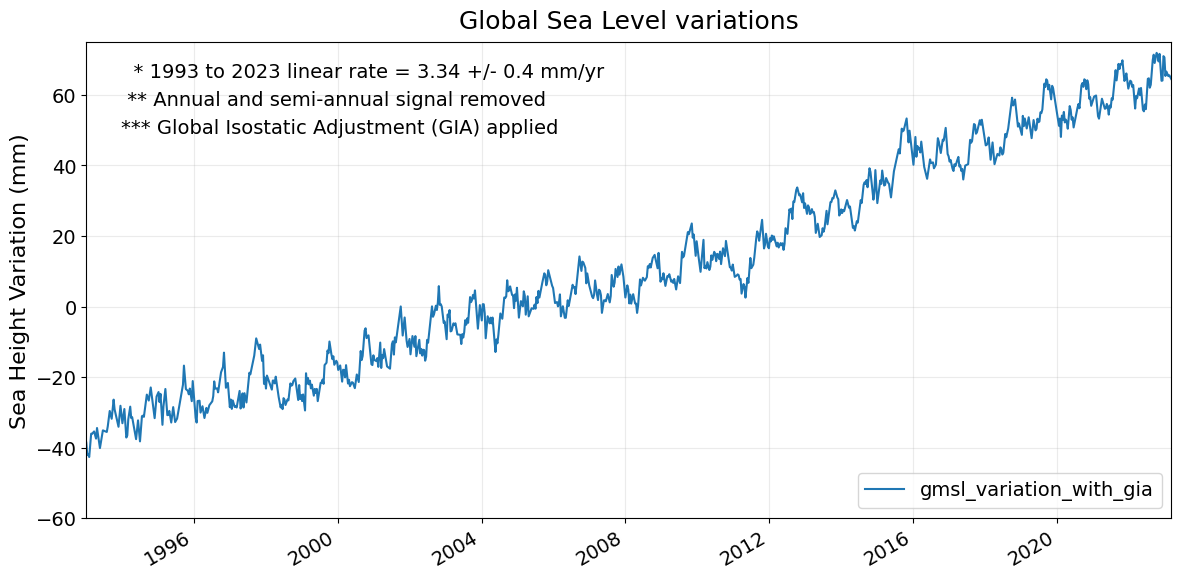

In [ ]:
# Plot the GMSL variation (with GIA and annual/semiannual signal removed):
ax = df.gmsl_variation_with_gia.plot(figsize=(14, 7), zorder=2)

# Get the upper and lower bounds of the error region:
error_upper = df.gmsl_variation_with_gia + df.gmsl_variation_with_gia_std
error_lower = df.gmsl_variation_with_gia - df.gmsl_variation_with_gia_std

# Plot the standard deviation of the GMSL variation (no GIA) as error region.
ax.fill_between(df.index, error_upper, error_lower, color="white", alpha=1, zorder=1)

# Add two footnotes about the data processing:
plt.figtext(0.15, 0.83, '  * 1993 to 2023 linear rate = 3.34 +/- 0.4 mm/yr')
plt.figtext(0.15, 0.79, ' ** Annual and semi-annual signal removed')
plt.figtext(0.15, 0.75, '*** Global Isostatic Adjustment (GIA) applied')

# Configure plot title, x and y axis labels and limits, and other aesthetics:
ax.set_title("Global Sea Level variations", pad=10)
ax.set_ylabel("Sea Height Variation (mm)")
ax.set_xlim(df.index[0], df.index[-1])
ax.set_xlabel(None)
ax.set_ylim(-60, 75)
ax.grid(alpha=0.25)
ax.legend(loc="lower right")

plt.show()

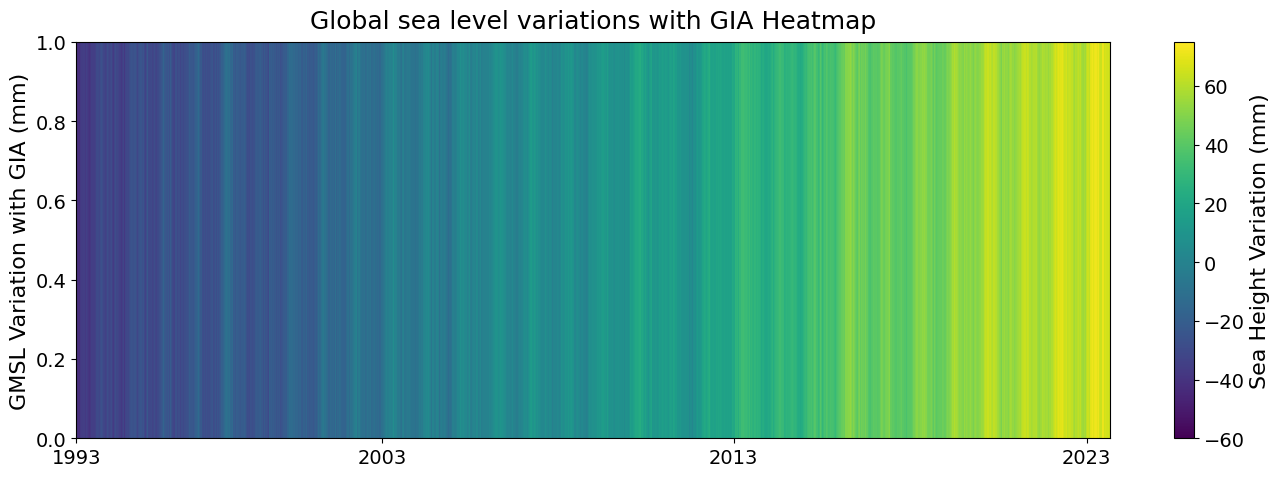

In [ ]:


# Extract the relevant data for the heat map
years = df['year'].values
gmsl_variation_with_gia = df['gmsl_variation_with_gia'].values

# Reshape the data to a 2D array for the heat map
data = gmsl_variation_with_gia.reshape(1, -1)  # Reshape as 1 row and multiple columns

# Generate the year labels by rounding the decimal years to integers
year_labels = np.round(years).astype(int)

# Create the heat map
fig, ax = plt.subplots(figsize=(14, 5))
heatmap = ax.pcolormesh(data, cmap="viridis", vmin=-60, vmax=75)

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax)
cbar.set_label("Sea Height Variation (mm)")

# Custom tick positions and labels for the x-axis (showing only specific years to symplify it)
specific_years = [1993, 2003, 2013, 2023]

# Find the positions of the specific years in the 'year_labels' array
x_tick_positions = [np.where(year_labels == year)[0][0] for year in specific_years]
x_tick_labels = specific_years

# Set the x-axis tick positions and labels using FixedLocator and FixedFormatter
ax.xaxis.set_major_locator(FixedLocator(x_tick_positions))
ax.xaxis.set_major_formatter(FixedFormatter(x_tick_labels))

# Set the y-axis label
ax.set_ylabel("GMSL Variation with GIA (mm)")

# Set the x-axis limits to show only the years 1993, 2003, 2013, and 2023
ax.set_xlim(0, len(years) - 1)

# Remove minor ticks on the x-axis
ax.xaxis.set_minor_locator(plt.NullLocator())

# Configure plot title and other aesthetics
ax.set_title("Global sea level variations with GIA Heatmap", pad=10)

plt.tight_layout()
plt.show()


**Line chart made interactive now with the use of plotly.graph_objects**



In [ ]:
import plotly.graph_objects as go

# Get the upper and lower bounds of the error region:
error_upper = df.gmsl_variation_with_gia + df.gmsl_variation_with_gia_std
error_lower = df.gmsl_variation_with_gia - df.gmsl_variation_with_gia_std

# Create the line plot for GMSL variation with GIA
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df.gmsl_variation_with_gia, name="GMSL Variation with GIA", mode="lines"))

# Customize the layout
fig.update_layout(
    title=dict(
        text="Global Sea Level variations",
        x=0.5,  # Center the title horizontally
        y=0.95,  # Set the y-coordinate to adjust the title vertical position
        xanchor='center',  # Anchor point for the x-coordinate (center)
        yanchor='top',  # Anchor point for the y-coordinate (top)
        font=dict(size=24)  # Set the font size of the title
    ),
    xaxis_title="Year",
    yaxis_title="Sea Height Variation (mm)",
    xaxis=dict(range=[df.index[0], df.index[-1]]),
    yaxis=dict(range=[-60, 75]),
    legend=dict(x=1, y=0.1),
    margin=dict(l=100, r=100, t=100, b=100),
    hovermode='x'
)

# Show the interactive plot
fig.show()

**Now showing only from 1993 to 2003**

In [ ]:
import plotly.graph_objects as go

# Filter data for the desired time period (1993 to 2003)
data_1993_to_2003 = df[(df.index >= '1993-01-01') & (df.index <= '2003-12-31')]

# Get the upper and lower bounds of the error region for the filtered data
error_upper = data_1993_to_2003.gmsl_variation_with_gia + data_1993_to_2003.gmsl_variation_with_gia_std
error_lower = data_1993_to_2003.gmsl_variation_with_gia - data_1993_to_2003.gmsl_variation_with_gia_std

# Create the line plot for GMSL variation with GIA
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_1993_to_2003.index, y=data_1993_to_2003.gmsl_variation_with_gia, name="GMSL Variation with GIA", mode="lines"))

# Customize the layout
fig.update_layout(
    title=dict(
        text="Global Sea Level variations (1993 - 2003)",
        x=0.5,  # Center the title horizontally
        y=0.95,  # Set the y-coordinate to adjust the title vertical position
        xanchor='center',  # Anchor point for the x-coordinate (center)
        yanchor='top',  # Anchor point for the y-coordinate (top)
        font=dict(size=24)  # Set the font size of the title
    ),
    xaxis_title="Year",
    yaxis_title="Sea Height Variation (mm)",
    xaxis=dict(range=[data_1993_to_2003.index.min(), data_1993_to_2003.index.max()]),
    yaxis=dict(range=[-60, 75]),
    legend=dict(x=1, y=0.1),
    margin=dict(l=100, r=100, t=100, b=100),
    hovermode='x'
)

# Show the interactive plot
fig.show()

**Now showing only from 2003 to 2013**

In [ ]:


# Filter data for the desired time period (2003 to 2013)
data_2003_to_2013 = df[(df.index >= '2003-01-01') & (df.index <= '2013-12-31')]

# Get the upper and lower bounds of the error region for the filtered data
error_upper = data_2003_to_2013.gmsl_variation_with_gia + data_2003_to_2013.gmsl_variation_with_gia_std
error_lower = data_2003_to_2013.gmsl_variation_with_gia - data_2003_to_2013.gmsl_variation_with_gia_std

# Create the line plot for GMSL variation with GIA
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_2003_to_2013.index, y=data_2003_to_2013.gmsl_variation_with_gia, name="GMSL Variation with GIA", mode="lines"))

# Customize the layout
fig.update_layout(
    title=dict(
        text="Global Sea Level variations (2003 - 2013)",
        x=0.5,  # Center the title horizontally
        y=0.95,  # Set the y-coordinate to adjust the title vertical position
        xanchor='center',  # Anchor point for the x-coordinate (center)
        yanchor='top',  # Anchor point for the y-coordinate (top)
        font=dict(size=24)  # Set the font size of the title
    ),
    xaxis_title="Year",
    yaxis_title="Sea Height Variation (mm)",
    xaxis=dict(range=[data_2003_to_2013.index.min(), data_2003_to_2013.index.max()]),
    yaxis=dict(range=[-60, 75]),
    legend=dict(x=1, y=0.1),
    margin=dict(l=100, r=100, t=100, b=100),
    hovermode='x'
)

# Show the interactive plot
fig.show()

**Now showing from 2013 to 2023**

In [ ]:


# Filter data for the desired time period (2013 to 2023)
data_2013_to_2023 = df[(df.index >= '2013-01-01') & (df.index <= '2023-12-31')]

# Get the upper and lower bounds of the error region for the filtered data
error_upper = data_2013_to_2023.gmsl_variation_with_gia + data_2013_to_2023.gmsl_variation_with_gia_std
error_lower = data_2013_to_2023.gmsl_variation_with_gia - data_2013_to_2023.gmsl_variation_with_gia_std

# Create the line plot for GMSL variation with GIA
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_2013_to_2023.index, y=data_2013_to_2023.gmsl_variation_with_gia, name="GMSL Variation with GIA", mode="lines"))

# Customize the layout
fig.update_layout(
    title=dict(
        text="Global Sea Level variations (2013 - 2023)",
        x=0.5,  # Center the title horizontally
        y=0.95,  # Set the y-coordinate to adjust the title vertical position
        xanchor='center',  # Anchor point for the x-coordinate (center)
        yanchor='top',  # Anchor point for the y-coordinate (top)
        font=dict(size=24)  # Set the font size of the title
    ),
    xaxis_title="Year",
    yaxis_title="Sea Height Variation (mm)",
    xaxis=dict(range=[data_2013_to_2023.index.min(), data_2013_to_2023.index.max()]),
    yaxis=dict(range=[-60, 75]),
    legend=dict(x=1, y=0.1),
    margin=dict(l=100, r=100, t=100, b=100),
    hovermode='x'
)

# Show the interactive plot
fig.show()

**Now, we are going to create an app using Dash library**

In [ ]:
pip install dash pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 20.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


In [ ]:
import dash
from dash import Dash, html, dash_table, dcc # importing all libraries needed
from dash.dependencies import Input, Output

In [ ]:
dates = df['year'].apply(_frac_year_to_dt)
dates.name = "time"
df = df.set_index(dates)
# Get the upper and lower bounds of the error region
error_upper = df.gmsl_variation_with_gia + df.gmsl_variation_with_gia_std
error_lower = df.gmsl_variation_with_gia - df.gmsl_variation_with_gia_std

# Create the line plot for GMSL variation with GIA
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df.gmsl_variation_with_gia, name="GMSL Variation with GIA", mode="lines"))

# Customize the layout
fig.update_layout(
    title=dict(
        text="Global Sea Level variations 1993-2023 in 3 decades",
        x=0.5,  # Center the title horizontally
        y=0.95,  # Set the y-coordinate to adjust the title vertical position
        xanchor='center',  # Anchor point for the x-coordinate (center)
        yanchor='top',  # Anchor point for the y-coordinate (top)
        font=dict(size=24)  # Set the font size of the title
    ),
    xaxis_title="Year",
    yaxis_title="Sea Height Variation (mm)",
    xaxis=dict(range=[df.index[0], df.index[-1]]),
    yaxis=dict(range=[-60, 75]),
    legend=dict(x=1, y=0.1),
    margin=dict(l=100, r=100, t=100, b=100),
    hovermode='x'
)

# Create the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    dcc.Dropdown(
        id='decade-dropdown',
        options=[
            {'label': '1993-2003', 'value': '1993-2003'},
            {'label': '2003-2013', 'value': '2003-2013'},
            {'label': '2013-2023', 'value': '2013-2023'}
        ],
        value='1993-2003',
    ),
    dcc.Graph(id='sea-level-variation', figure=fig)
])

# Define the callback function
@app.callback(
    Output('sea-level-variation', 'figure'),
    [Input('decade-dropdown', 'value')]
)
def update_sea_level_figure(selected_decade):
    # Extract the data for the selected decade from the DataFrame
    selected_data = df[(df['year'] >= int(selected_decade[:4])) & (df['year'] <= int(selected_decade[-4:]))]

    # Update the x and y data of the figure
    fig.update_traces(x=selected_data.index, y=selected_data['gmsl_variation_with_gia'])

    # Update the x-axis range
    fig.update_xaxes(range=[selected_data.index.min(), selected_data.index.max()])

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>